<a href="https://colab.research.google.com/github/HenHimA1/A1/blob/master/KNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library Python

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md

Import dataset dengan pandas

In [29]:
inputan1 = pd.read_csv("/content/lampu3 (1).csv", delimiter=";")
inputan2 = pd.read_excel("/content/ubah1lampu.xlsx")
outputan = pd.read_excel("/content/lampcombination.xlsx")

Menampilkan jumlah data

In [30]:
print(inputan1.shape)
print(inputan2.shape)
print(outputan.shape)

(4799, 2)
(935, 5)
(4799, 7)


Mengambil data power sebagai input

In [31]:
X_inputan1 = inputan1.iloc[:,0:2]
X_inp1 = np.array(X_inputan1)
# X_inp1 = X_inp1.reshape(-1,1)

Mengambil data nyala lampu sebagai output

In [32]:
Y_outputan = outputan.iloc[:,2:7]
Y_out = np.array(Y_outputan)

Karena output an berupa nyala lampu, maka nilai output an dirubah kedalam bentuk integer. contoh jika output an berupa nyala lampu 2 dan 5 maka output an menjadi 
**[0, 1, 0, 0, 1]**. Jika diubah dalam bentu integer maka output berupa **[0 X 2^0, 1 X 2^1, 0 X 2^2, 0 X 2^3, 1 X 2^4] = 18**

In [33]:
Y = []
for i in range(Y_out.shape[0]):
  Y_now = Y_out[i,:]
  res = int("".join(str(x) for x in Y_now), 2)
  Y.append(res) 
Y_out = np.array(Y)

Menampilkan unique output dan jumlahnya (array pertama nilai unique dan array kedua jumlah nilai unique)

In [34]:
np.unique(Y_out,return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 22, 23, 24, 25, 27, 28, 29, 30, 31]),
 array([149, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150,
        150, 150, 150, 150, 300, 150, 150, 150, 150, 150, 150, 300, 150,
        150, 150, 150, 150]))

Kemudian pisahkan antara data training dengan data testing (data testing tiga puluh persen dari data training)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_inp1, Y_out, test_size=0.30, random_state=42)

In [36]:
X_train[:,1]

array([1584079823, 1584079493, 1584073593, ..., 1584077303, 1584078663,
       1584072839])

Optimasi nilai K

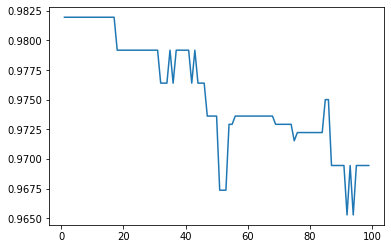

In [37]:
jumlah_kno = []
akurasi = []
for i in range(1,100):
  fungsi_knno = KNeighborsClassifier(n_neighbors=i)
  fungsi_knno.fit(X_train[:,0:1],y_train)
  prediksio = fungsi_knno.predict(X_test[:,0:1])
  akurasi.append(accuracy_score(y_test, prediksio))
  jumlah_kno.append(i)
plt.plot(jumlah_kno,akurasi)
plt.show()

Masukkan input dan output ke dalam fungsi KNN

In [38]:
jumlah_n = 10
fungsi_knn = KNeighborsClassifier(n_neighbors=jumlah_n)
fungsi_knn.fit(X_train[:,0:1],y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

Uji coba model dengan data testing

In [39]:
prediksi = fungsi_knn.predict(X_test[:,0:1])
print("Nilai Akurasi =",accuracy_score(y_test, prediksi))
print("Jumlah Prediksi Yang benar =",accuracy_score(y_test, prediksi, normalize=False))
print("Jumlah Data =",y_test.shape[0])

Nilai Akurasi = 0.9819444444444444
Jumlah Prediksi Yang benar = 1414
Jumlah Data = 1440


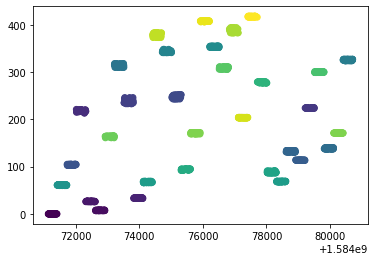

In [40]:
plt.figure(1)
plt.scatter(X_test[:,1],X_test[:,0], c=y_test)
plt.show()

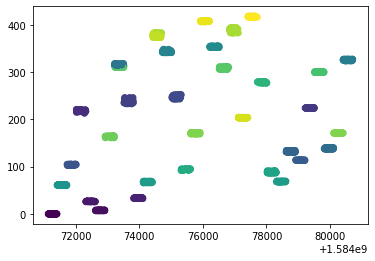

In [41]:
plt.scatter(X_test[:,1],X_test[:,0], c=prediksi)
plt.show()

In [42]:
k_ytest = []
for i in y_test:
  n=0
  zdata = [0,0,0,0,0]
  res = [int(j) for j in list('{0:0b}'.format(i))]
  for b in res:
    zdata[n] = b
    n+=1
  k_ytest.append(zdata)

In [43]:
k_prediksi = []
for i in prediksi:
  n=0
  zdata = [0,0,0,0,0]
  res = [int(j) for j in list('{0:0b}'.format(i))]
  for b in res:
    zdata[n] = b
    n+=1
  k_prediksi.append(zdata)

In [44]:
k_ytest1 = np.array(k_ytest)[:,0]
k_ytest2 = np.array(k_ytest)[:,1]
k_ytest3 = np.array(k_ytest)[:,2]
k_ytest4 = np.array(k_ytest)[:,3]
k_ytest5 = np.array(k_ytest)[:,4]
k_prediksi1 = np.array(k_prediksi)[:,0]
k_prediksi2 = np.array(k_prediksi)[:,1]
k_prediksi3 = np.array(k_prediksi)[:,2]
k_prediksi4 = np.array(k_prediksi)[:,3]
k_prediksi5 = np.array(k_prediksi)[:,4]

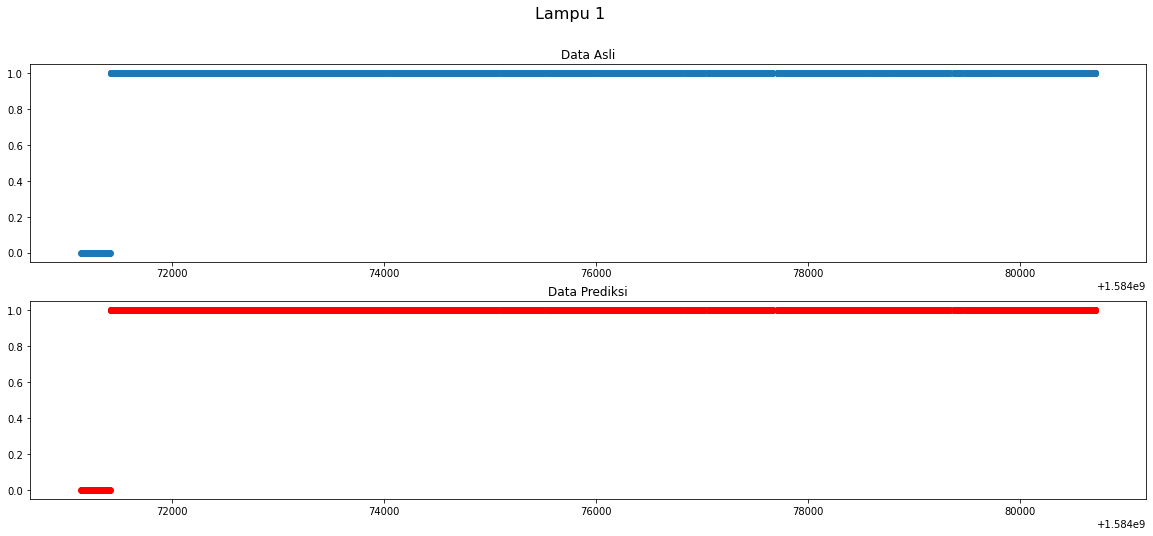

In [45]:
plt.figure(figsize=(20, 8))
plt.suptitle('Lampu 1', fontsize=16)
plt.subplot(211)
plt.scatter(X_test[:,1],k_ytest1)
plt.title("Data Asli")
plt.subplot(212)
plt.scatter(X_test[:,1],k_prediksi1, color='red')
plt.title("Data Prediksi")
plt.show()

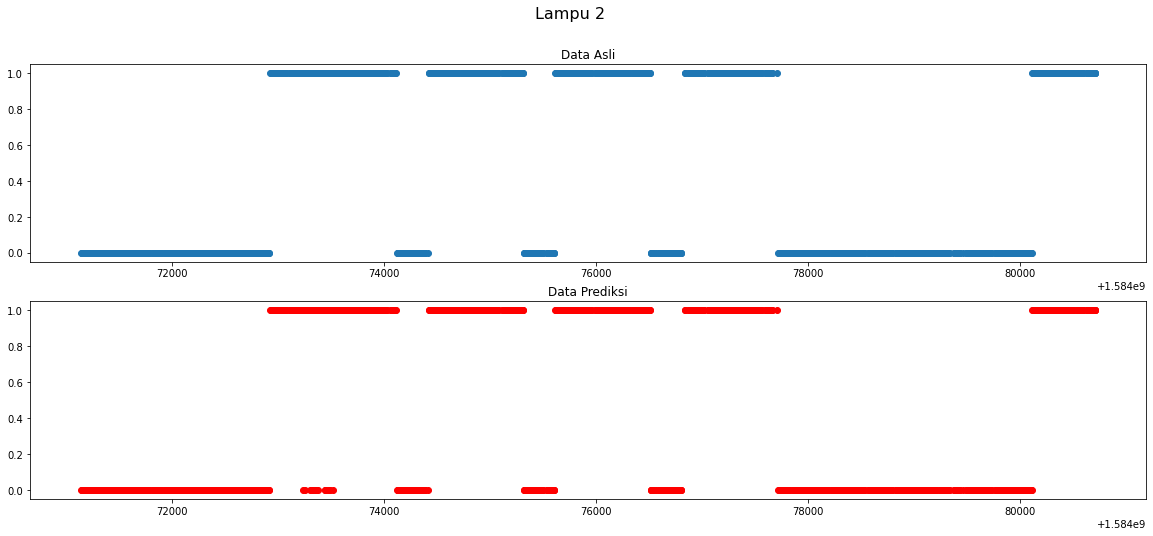

In [46]:
plt.figure(figsize=(20, 8))
plt.suptitle('Lampu 2', fontsize=16)
plt.subplot(211)
plt.scatter(X_test[:,1],k_ytest2)
plt.title("Data Asli")
plt.subplot(212)
plt.scatter(X_test[:,1],k_prediksi2, color='red')
plt.title("Data Prediksi")
plt.show()

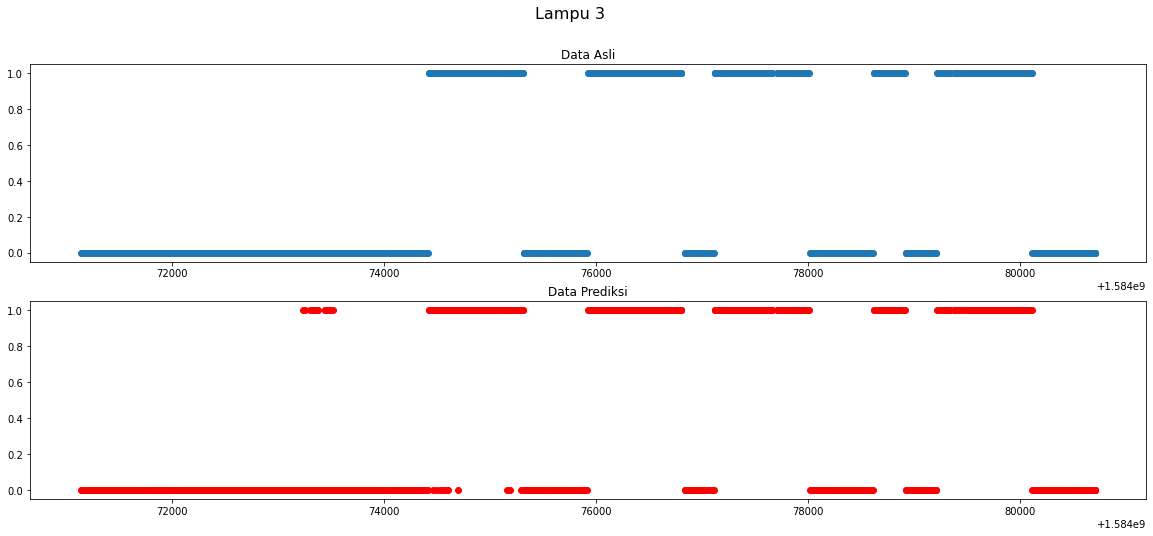

In [47]:
plt.figure(figsize=(20, 8))
plt.suptitle('Lampu 3', fontsize=16)
plt.subplot(211)
plt.scatter(X_test[:,1],k_ytest3)
plt.title("Data Asli")
plt.subplot(212)
plt.scatter(X_test[:,1],k_prediksi3, color='red')
plt.title("Data Prediksi")
plt.show()

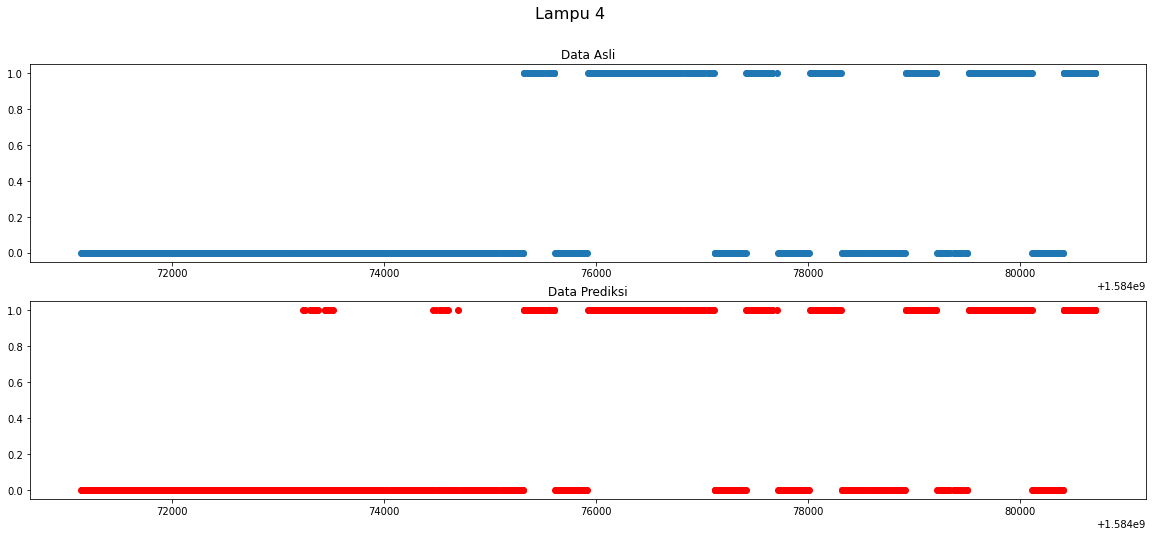

In [48]:
plt.figure(figsize=(20, 8))
plt.suptitle('Lampu 4', fontsize=16)
plt.subplot(211)
plt.scatter(X_test[:,1],k_ytest4)
plt.title("Data Asli")
plt.subplot(212)
plt.scatter(X_test[:,1],k_prediksi4, color='red')
plt.title("Data Prediksi")
plt.show()

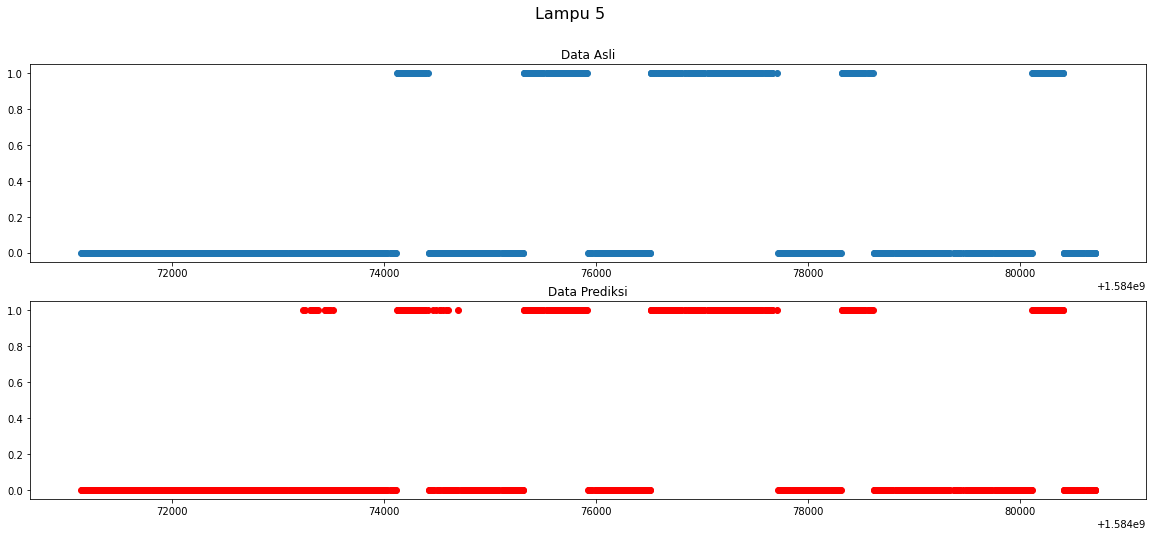

In [49]:
plt.figure(figsize=(20, 8))
plt.suptitle('Lampu 5', fontsize=16)
plt.subplot(211)
plt.scatter(X_test[:,1],k_ytest5)
plt.title("Data Asli")
plt.subplot(212)
plt.scatter(X_test[:,1],k_prediksi5, color='red')
plt.title("Data Prediksi")
plt.show()

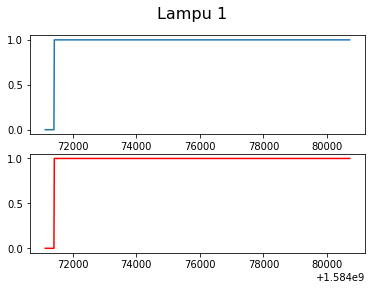

In [56]:
lampu1linetest = np.array([X_test[:,1],k_ytest1]).transpose()
lampu1linetest = lampu1linetest[np.argsort(lampu1linetest[:, 0])]
lampu1linetest = lampu1linetest.transpose()
lampu1lineprediksi = np.array([X_test[:,1],k_prediksi1]).transpose()
lampu1lineprediksi = lampu1lineprediksi[np.argsort(lampu1lineprediksi[:, 0])]
lampu1lineprediksi = lampu1lineprediksi.transpose()
plt.suptitle('Lampu 1', fontsize=16)
plt.subplot(2,1,1)
plt.plot(lampu1linetest[0],lampu1linetest[1])
plt.subplot(2,1,2)
plt.plot(lampu1lineprediksi[0],lampu1lineprediksi[1], color="red")
plt.show()

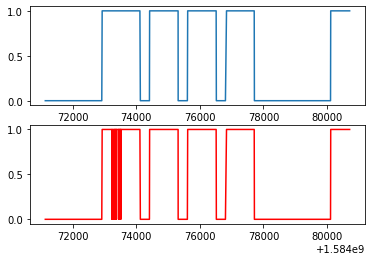

In [51]:
lampu2linetest = np.array([X_test[:,1],k_ytest2]).transpose()
lampu2linetest = lampu2linetest[np.argsort(lampu2linetest[:, 0])]
lampu2linetest = lampu2linetest.transpose()
lampu2lineprediksi = np.array([X_test[:,1],k_prediksi2]).transpose()
lampu2lineprediksi = lampu2lineprediksi[np.argsort(lampu2lineprediksi[:, 0])]
lampu2lineprediksi = lampu2lineprediksi.transpose()
plt.subplot(2,1,1)
plt.plot(lampu2linetest[0],lampu2linetest[1])
plt.subplot(2,1,2)
plt.plot(lampu2lineprediksi[0],lampu2lineprediksi[1], color="red")
plt.show()

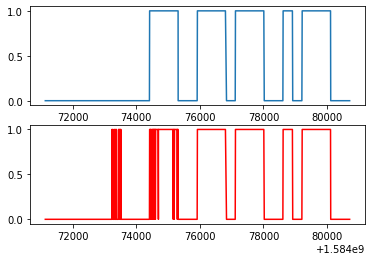

In [52]:
lampu3linetest = np.array([X_test[:,1],k_ytest3]).transpose()
lampu3linetest = lampu3linetest[np.argsort(lampu3linetest[:, 0])]
lampu3linetest = lampu3linetest.transpose()
lampu3lineprediksi = np.array([X_test[:,1],k_prediksi3]).transpose()
lampu3lineprediksi = lampu3lineprediksi[np.argsort(lampu3lineprediksi[:, 0])]
lampu3lineprediksi = lampu3lineprediksi.transpose()
plt.subplot(2,1,1)
plt.plot(lampu3linetest[0],lampu3linetest[1])
plt.subplot(2,1,2)
plt.plot(lampu3lineprediksi[0],lampu3lineprediksi[1], color="red")
plt.show()

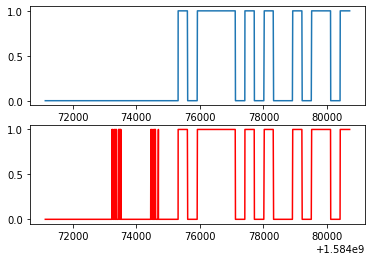

In [53]:
lampu4linetest = np.array([X_test[:,1],k_ytest4]).transpose()
lampu4linetest = lampu4linetest[np.argsort(lampu4linetest[:, 0])]
lampu4linetest = lampu4linetest.transpose()
lampu4lineprediksi = np.array([X_test[:,1],k_prediksi4]).transpose()
lampu4lineprediksi = lampu4lineprediksi[np.argsort(lampu4lineprediksi[:, 0])]
lampu4lineprediksi = lampu4lineprediksi.transpose()
plt.subplot(2,1,1)
plt.plot(lampu4linetest[0],lampu4linetest[1])
plt.subplot(2,1,2)
plt.plot(lampu4lineprediksi[0],lampu4lineprediksi[1], color="red")
plt.show()

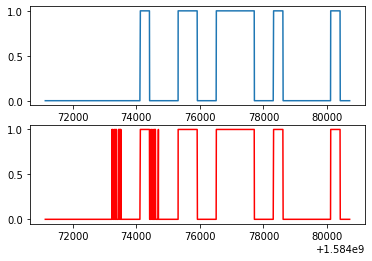

In [54]:
lampu5linetest = np.array([X_test[:,1],k_ytest5]).transpose()
lampu5linetest = lampu5linetest[np.argsort(lampu5linetest[:, 0])]
lampu5linetest = lampu5linetest.transpose()
lampu5lineprediksi = np.array([X_test[:,1],k_prediksi5]).transpose()
lampu5lineprediksi = lampu5lineprediksi[np.argsort(lampu5lineprediksi[:, 0])]
lampu5lineprediksi = lampu5lineprediksi.transpose()
plt.subplot(2,1,1)
plt.plot(lampu5linetest[0],lampu5linetest[1])
plt.subplot(2,1,2)
plt.plot(lampu5lineprediksi[0],lampu5lineprediksi[1], color="red")
plt.show()

Menghitung konsumsi daya

In [77]:
jumlah_data = len(lampu1lineprediksi[1])
data1 = lampu1lineprediksi[1].sum()
data2 = lampu2lineprediksi[1].sum()
data3 = lampu3lineprediksi[1].sum()
data4 = lampu4lineprediksi[1].sum()
data5 = lampu5lineprediksi[1].sum()
datatotal = data1 + data2 + data3 + data4 + data5
konsumsidaya1 = data1/datatotal
konsumsidaya2 = data2/datatotal
konsumsidaya3 = data3/datatotal
konsumsidaya4 = data4/datatotal
konsumsidaya5 = data5/datatotal
print("Lampu 1 =",konsumsidaya1* 100, "%")
print("Lampu 2 =",konsumsidaya2* 100, "%")
print("Lampu 3 =",konsumsidaya3* 100, "%")
print("Lampu 4 =",konsumsidaya4* 100, "%")
print("Lampu 5 =",konsumsidaya5* 100, "%")
print("Total =",(konsumsidaya1+konsumsidaya2+konsumsidaya3+konsumsidaya4+konsumsidaya5)*100,"%")

Lampu 1 = 39.4007914075749 %
Lampu 2 = 18.14584511023177 %
Lampu 3 = 16.082532504239683 %
Lampu 4 = 14.386659129451667 %
Lampu 5 = 11.98417184850198 %
Total = 100.0 %
